# Visualizing Earning Based On College Majors
The dataset contains information on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors)

Data | Description
 ---  | --- 
Rank | Rank by median earnings (the dataset is ordered by this column).
Major_code | Major code.
Major | Major description.
Major_category | Category of major.
Total | Total number of people with major.
Sample_size | Sample size (unweighted) of full-time.
Men | Male graduates.
Women | Female graduates.
ShareWomen | Women as share of total.
Employed | Number employed.
Median | Median salary of full-time, year-round workers.
Low_wage_jobs | Number in low-wage service jobs.
Full_time | Number employed 35 hours or more.
Part_time | Number employed less than 35 hours.

In [87]:
import pandas as pd
from numpy import arange
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
recent_grads = pd.read_csv("recent-grads.csv", index_col = 0)
recent_grads.index.name = None
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [29]:
recent_grads.iloc[0,:]

Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 1, dtype: object

In [30]:
recent_grads.head()

,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [31]:
recent_grads.describe()

,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Dropping rows with missing values 

In [32]:
recent_grads = recent_grads.dropna()

In [34]:
cleaned_data_count = recent_grads.shape[0]
raw_data_count-cleaned_data_count

1

Only one row contained missing values

## Exploratory analysis

### Relation Analysis
* **Employed vs. Sample_size**

(0, 325000)

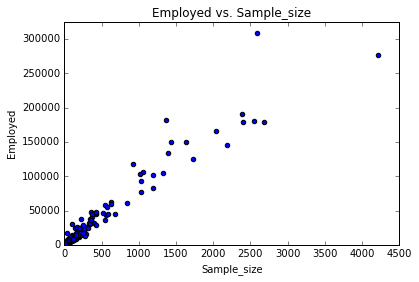

In [71]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')
ax.set_xlim(0,4500)
ax.set_ylim(0,325000)

* **Sample_size vs. Median**

(20000, 120000)

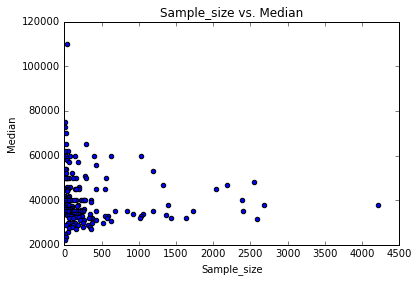

In [63]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title("Sample_size vs. Median")
ax.set_xlim(0,4500)
ax.set_ylim(20000,120000)

* **Sample_size vs. Unemployment_rate**

(0, 0.2)

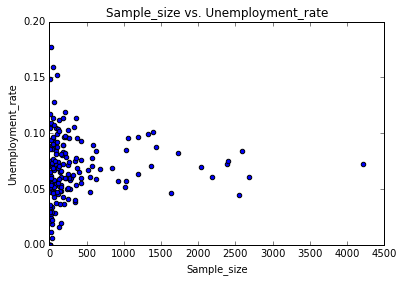

In [62]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title("Sample_size vs. Unemployment_rate")
ax.set_xlim(0,4500)
ax.set_ylim(0,0.2)

All majors make, on average, the same money regardless of the number of full time employees it has projected. 

* **Full_time vs. Median**

(20000, 120000)

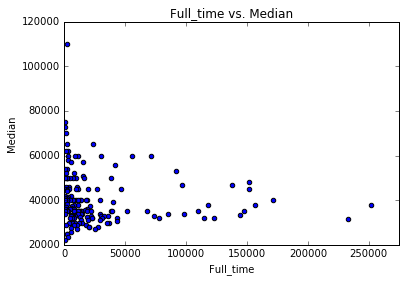

In [61]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title("Full_time vs. Median")
ax.set_xlim(0,275000)
ax.set_ylim(20000,120000)

* **ShareWomen vs. Unemployment_rate**

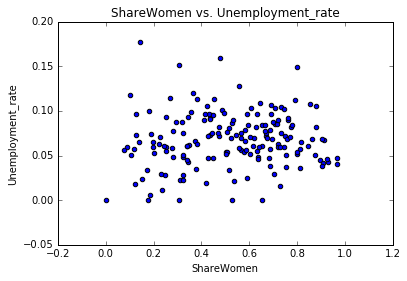

In [55]:
ax =recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title = "ShareWomen vs. Unemployment_rate")
ax.set_title("ShareWomen vs. Unemployment_rate")

All majors have, on average, the same unemployment rate regardless of the number of women graduated.

* **Men vs. Median**

(20000, 120000)

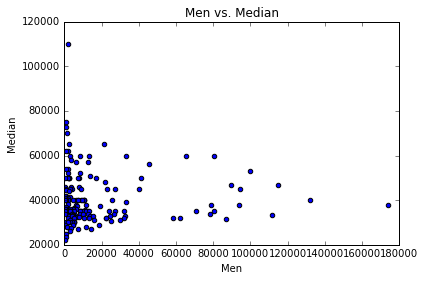

In [65]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title("Men vs. Median")
ax.set_xlim(0,180000)
ax.set_ylim(20000,120000)

All majors make, on average, the same money regardless of their popularity.

* **Women vs. Median**

(20000, 125000)

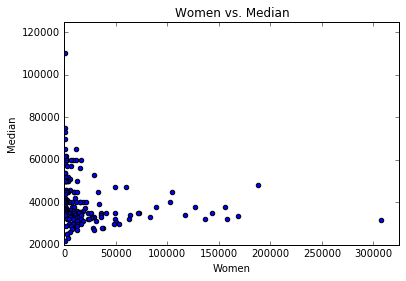

In [69]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title("Women vs. Median")
ax.set_xlim(0,325000)
ax.set_ylim(20000,125000)

### Frequency of occurances
* sample_size

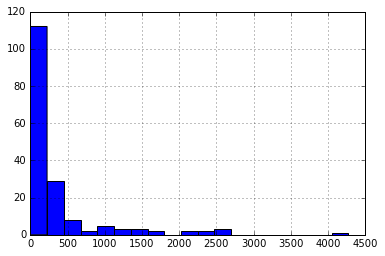

In [73]:
recent_grads['Sample_size'].hist(bins=20, range=(0,4500))

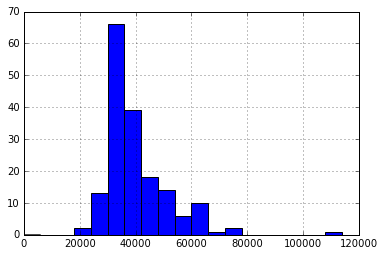

In [74]:
recent_grads['Median'].hist(bins=20, range=(0,120000))

The most common median salary range is $30k-$35k approximately

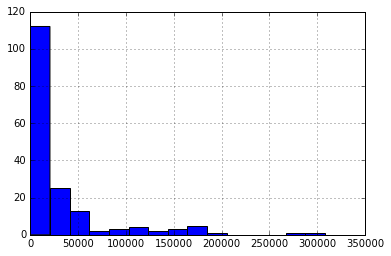

In [81]:
recent_grads['Employed'].hist(bins=15, range=(0,max(recent_grads['Employed'])))

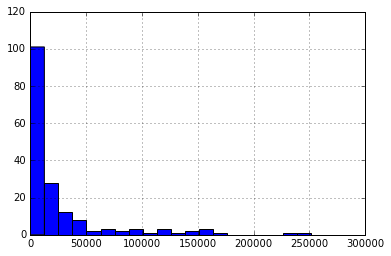

In [82]:
recent_grads['Full_time'].hist(bins=20, range=(0,max(recent_grads['Full_time'])))

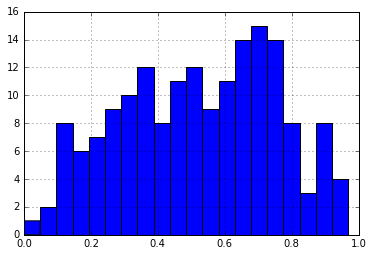

In [83]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,max(recent_grads['ShareWomen'])))

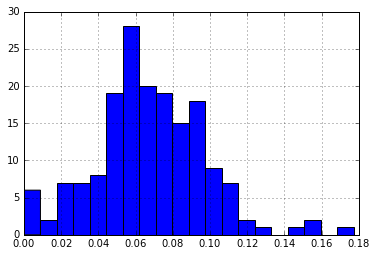

In [84]:
recent_grads['Unemployment_rate'].hist(bins=20, range=(0,max(recent_grads['Unemployment_rate'])))

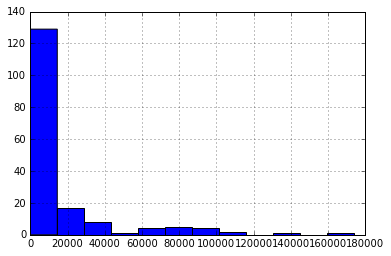

In [85]:
recent_grads['Men'].hist(bins=12, range=(0,max(recent_grads['Men'])))

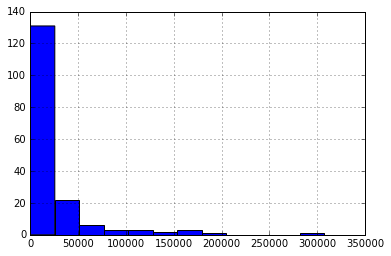

In [86]:
recent_grads['Women'].hist(bins=12, range=(0,max(recent_grads['Women'])))

### Generating scatter matrices to study relation and distribution of parameter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb525aaa940>,
      dtype=object)

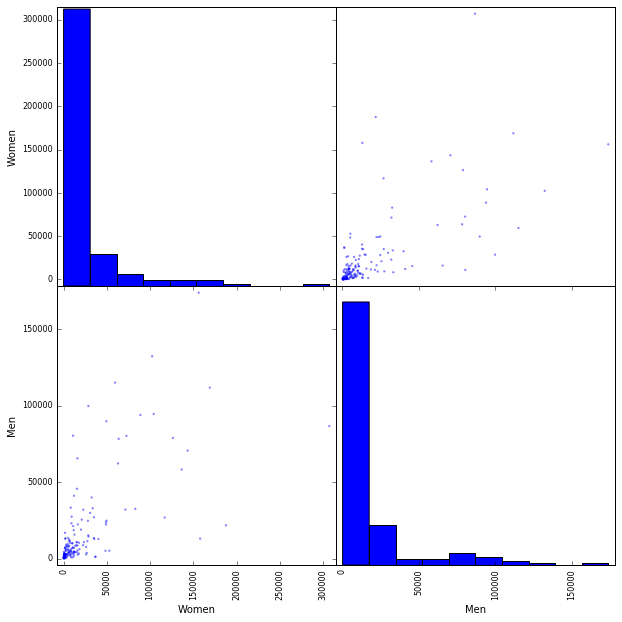

In [88]:
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5258d5d68>,
      dtype=object)

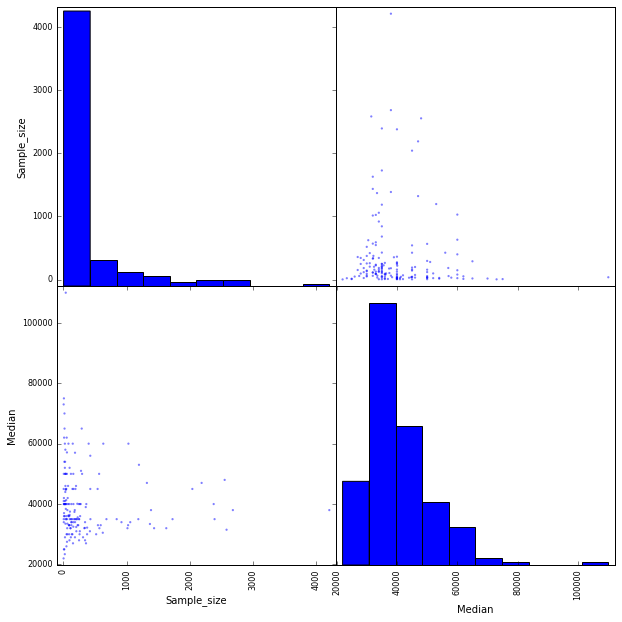

In [89]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb525775860>,
      dtype=object)

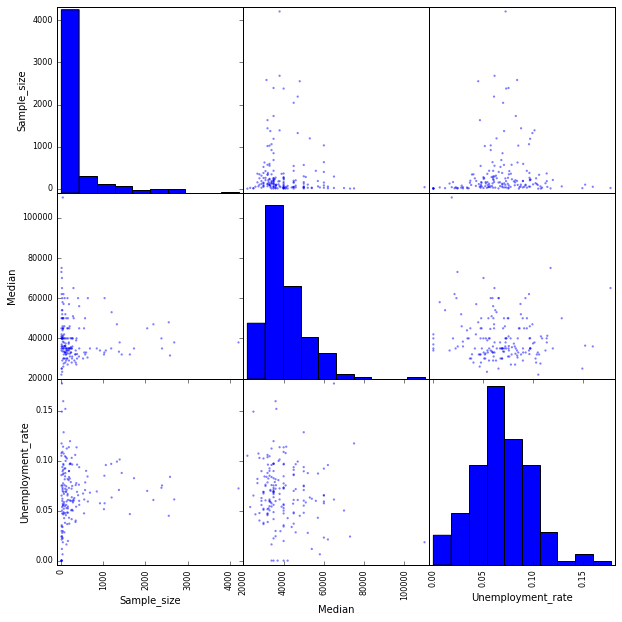

In [90]:
scatter_matrix(recent_grads[['Sample_size', 'Median',"Unemployment_rate"]], figsize=(10,10))

### Parameter field value analysis

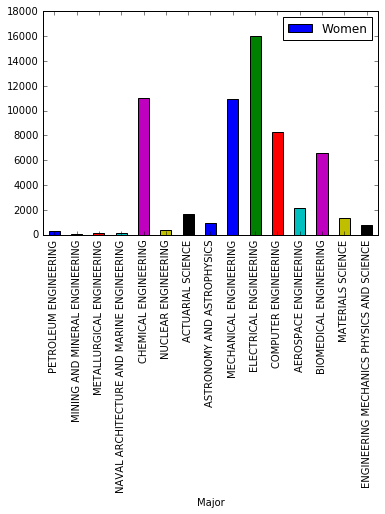

In [93]:
recent_grads[:15].plot.bar(x='Major', y='Women')

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


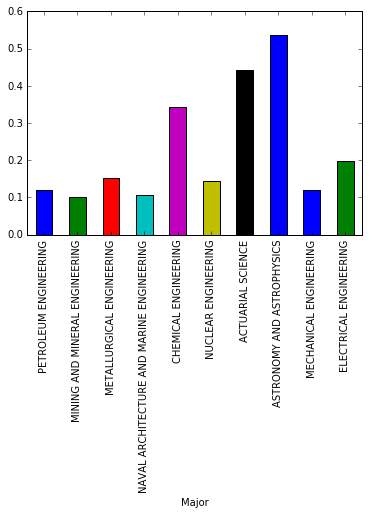

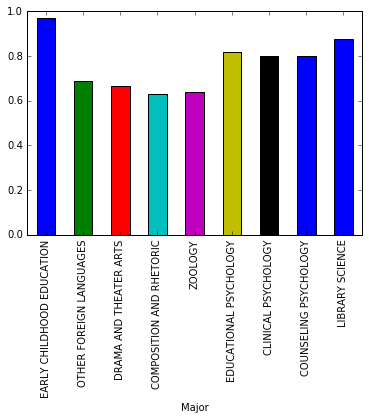

In [99]:
print(recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False))
print(recent_grads[recent_grads.shape[0]-9:].plot.bar(x='Major', y='ShareWomen', legend=False))

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


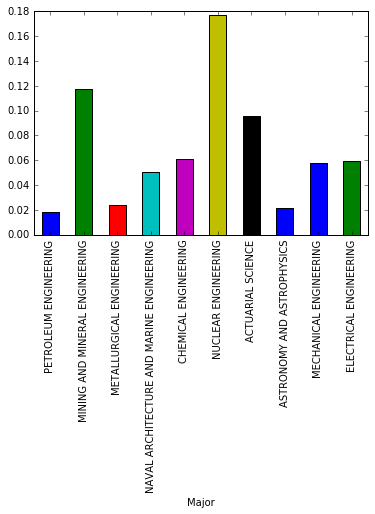

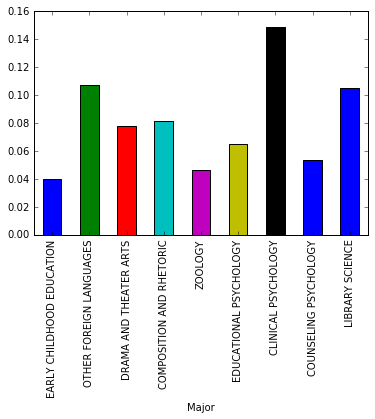

In [100]:
print(recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False))
print(recent_grads[recent_grads.shape[0]-9:].plot.bar(x='Major', y='Unemployment_rate', legend=False))


### Grouped barplot analyzing proportionality of men and women in different majors

In [102]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [110]:
category_majors = recent_grads["Major"].unique()
x = arange(len(category_majors))
width = 0.35
men_count = {}
women_count = {}
# for row in recent_grads:
#     major = row["Major"]
#     if(major in men_count):
#         men_count[major] +=row["Men"]
#         women_count[major]+=row["Women"]
#     else:
#         men_count[major] = row["Men"]
#         women_count[major] = row["Women"]
recent_grads["Men"].value_counts()

18951.0     1
2794.0      1
1589.0      1
78857.0     1
2662.0      1
7574.0      1
1749.0      1
4435.0      1
80320.0     1
3477.0      1
12953.0     1
1499.0      1
26893.0     1
10031.0     1
132238.0    1
9950.0      1
5291.0      1
45683.0     1
134.0       1
568.0       1
22357.0     1
6820.0      1
11431.0     1
6607.0      1
4754.0      1
12453.0     1
78253.0     1
32923.0     1
4133.0      1
23736.0     1
           ..
13496.0     1
1970.0      1
2947.0      1
877.0       1
2110.0      1
679.0       1
8181.0      1
93880.0     1
3156.0      1
885.0       1
2734.0      1
58227.0     1
115030.0    1
24786.0     1
9005.0      1
89749.0     1
10732.0     1
15670.0     1
15204.0     1
86648.0     1
2695.0      1
5521.0      1
2949.0      1
33258.0     1
29909.0     1
931.0       1
8697.0      1
1167.0      1
11376.0     1
2057.0      1
Name: Men, Length: 172, dtype: int64

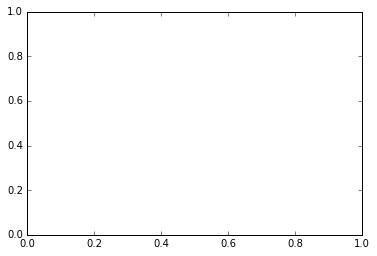

In [101]:
fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_count, width, label='Men')
rects2 = ax.bar(x + width/2, women_count, width, label='Women')
